In [1]:
import pandas as pd

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
allprices = pd.read_csv("Datasets/Prices_E_All_Data.csv", encoding = "latin1")

In [8]:
allprices.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,515,Apples,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Afghanistan,515,Apples,5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,526,Apricots,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
#Datatype per column
allprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26551 entries, 0 to 26550
Data columns (total 34 columns):
Area Code       26551 non-null int64
Area            26551 non-null object
Item Code       26551 non-null int64
Item            26551 non-null object
Element Code    26551 non-null int64
Element         26551 non-null object
Unit            26551 non-null object
Y1991           10675 non-null float64
Y1992           11813 non-null float64
Y1993           13488 non-null float64
Y1994           14437 non-null float64
Y1995           15498 non-null float64
Y1996           16239 non-null float64
Y1997           16914 non-null float64
Y1998           17748 non-null float64
Y1999           17983 non-null float64
Y2000           18868 non-null float64
Y2001           19221 non-null float64
Y2002           19344 non-null float64
Y2003           19408 non-null float64
Y2004           19043 non-null float64
Y2005           19178 non-null float64
Y2006           19349 non-null float64
Y200

In [7]:
#See columns and unique values
for column in allprices:
    print(column)
    print(allprices[column].unique())

Area Code
[  2   3   4   7   8   9   1  10  11  52  16  14  57 255  15  23  53  18
  19  80  20  21  26  27 233  29  35 115  32  33  37  39  40 351  96  41
  44  45  46  47  48 107  98  49  50 167  51  54  56  58  59  60  61 178
  63 238  62  66  67  68  69  70  75  73  79  81  84  86  87  89  90 175
  91  93  95  97  99 100 101 102 103 104 105 106 109 110 112 108 114 118
 113 120 119 121 122 126 256 129 130 131 132 133 134 135 136 137 138 141
 143 144  28 147 149 150 153 156 157 158 159 162 299 221 165 166 169 170
 171 173 174 177 179 117 146 182 183 185 184 188 189 191 244 194 195 272
 186 196 197 200 199 198 202 203  38 276 206 207 210 211 212 208 216 154
 176 217 220 222 223 213 230 229 215 231 234 155 236 237 249 251 181]
Area
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosni

In [9]:
#Remove columns YxxxxF as they do not have values
allprices = allprices[allprices.columns.drop(list(allprices.filter(regex='F')))]

### New dataframe including only Mexico, USA and Canada considering prices in USD

In [19]:
#Selecting only North America Countries
northAmerica = ["Mexico", "United States of America", "Canada"]
nap = allprices.loc[allprices["Area"].isin(northAmerica)]

In [29]:
#Selecting prices in USD 
nap = nap[nap["Element"] == "Producer Price (USD/tonne)"]

In [30]:
nap.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1992,Y1993,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
4268,33,Canada,515,Apples,5532,Producer Price (USD/tonne),USD,247.0,221.7,205.4,...,383.8,361.3,397.8,408.0,529.5,553.0,475.2,414.8,429.4,471.8
4271,33,Canada,526,Apricots,5532,Producer Price (USD/tonne),USD,807.4,614.7,709.3,...,1404.8,1165.6,1363.4,1585.6,1390.6,1657.1,1317.0,1328.9,1426.6,1459.1
4274,33,Canada,367,Asparagus,5532,Producer Price (USD/tonne),USD,1840.8,1981.4,1958.8,...,2770.2,2694.8,3355.5,3440.6,3673.9,3479.0,3425.4,3133.3,3105.6,3516.5
4277,33,Canada,44,Barley,5532,Producer Price (USD/tonne),USD,64.6,62.9,55.8,...,207.1,164.5,141.7,195.0,224.9,237.3,169.0,174.1,166.3,148.8
4280,33,Canada,176,"Beans, dry",5532,Producer Price (USD/tonne),USD,255.7,285.4,272.9,...,740.7,659.0,636.7,843.0,946.6,817.5,793.6,726.4,656.7,622.5


### Maize

In [96]:
maizeM = nap[nap["Item"] == "Maize"]
maizeM

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1992,Y1993,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
4352,33,Canada,56,Maize,5532,Producer Price (USD/tonne),USD,94.3,81.1,102.3,...,186.8,159.1,166.8,238.6,258.7,224.8,167.8,150.4,146.2,146.7
15448,138,Mexico,56,Maize,5532,Producer Price (USD/tonne),USD,234.2,245.9,246.5,...,253.1,207.4,222.9,328.2,304.5,263.5,234.4,216.0,189.2,190.7
25420,231,United States of America,56,Maize,5532,Producer Price (USD/tonne),USD,93.0,81.0,98.0,...,160.0,140.0,204.0,245.0,271.0,176.0,146.0,142.0,132.0,130.0


In [118]:
#Check values available per food Item
for item in items:
    print(item)
    nap[nap["Item"] == item].info()

Apples
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 4268 to 25285
Data columns (total 34 columns):
Area Code       3 non-null int64
Area            3 non-null object
Item Code       3 non-null int64
Item            3 non-null object
Element Code    3 non-null int64
Element         3 non-null object
Unit            3 non-null object
Y1991           3 non-null float64
Y1992           3 non-null float64
Y1993           3 non-null float64
Y1994           3 non-null float64
Y1995           3 non-null float64
Y1996           3 non-null float64
Y1997           3 non-null float64
Y1998           3 non-null float64
Y1999           3 non-null float64
Y2000           3 non-null float64
Y2001           3 non-null float64
Y2002           3 non-null float64
Y2003           3 non-null float64
Y2004           3 non-null float64
Y2005           3 non-null float64
Y2006           3 non-null float64
Y2007           3 non-null float64
Y2008           3 non-null float64
Y2009           3 no

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 4379 to 25450
Data columns (total 34 columns):
Area Code       3 non-null int64
Area            3 non-null object
Item Code       3 non-null int64
Item            3 non-null object
Element Code    3 non-null int64
Element         3 non-null object
Unit            3 non-null object
Y1991           2 non-null float64
Y1992           2 non-null float64
Y1993           2 non-null float64
Y1994           2 non-null float64
Y1995           2 non-null float64
Y1996           2 non-null float64
Y1997           2 non-null float64
Y1998           3 non-null float64
Y1999           3 non-null float64
Y2000           3 non-null float64
Y2001           3 non-null float64
Y2002           3 non-null float64
Y2003           3 non-null float64
Y2004           3 non-null float64
Y2005           3 non-null float64
Y2006           3 non-null float64
Y2007           3 non-null float64
Y2008           3 non-null float64
Y2009           3 non-null 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 15304 to 25300
Data columns (total 34 columns):
Area Code       2 non-null int64
Area            2 non-null object
Item Code       2 non-null int64
Item            2 non-null object
Element Code    2 non-null int64
Element         2 non-null object
Unit            2 non-null object
Y1991           2 non-null float64
Y1992           2 non-null float64
Y1993           2 non-null float64
Y1994           2 non-null float64
Y1995           2 non-null float64
Y1996           2 non-null float64
Y1997           2 non-null float64
Y1998           2 non-null float64
Y1999           2 non-null float64
Y2000           2 non-null float64
Y2001           2 non-null float64
Y2002           2 non-null float64
Y2003           2 non-null float64
Y2004           2 non-null float64
Y2005           2 non-null float64
Y2006           2 non-null float64
Y2007           2 non-null float64
Y2008           2 non-null float64
Y2009           2 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 15532 to 25489
Data columns (total 34 columns):
Area Code       2 non-null int64
Area            2 non-null object
Item Code       2 non-null int64
Item            2 non-null object
Element Code    2 non-null int64
Element         2 non-null object
Unit            2 non-null object
Y1991           1 non-null float64
Y1992           1 non-null float64
Y1993           1 non-null float64
Y1994           1 non-null float64
Y1995           1 non-null float64
Y1996           2 non-null float64
Y1997           2 non-null float64
Y1998           2 non-null float64
Y1999           2 non-null float64
Y2000           2 non-null float64
Y2001           2 non-null float64
Y2002           2 non-null float64
Y2003           2 non-null float64
Y2004           2 non-null float64
Y2005           2 non-null float64
Y2006           1 non-null float64
Y2007           1 non-null float64
Y2008           1 non-null float64
Y2009           1 non-null

#### Line plots

In [50]:
%matplotlib notebook

In [72]:
#Define time series
time = [1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]

In [56]:
maize = nap[nap["Item"] == "Maize"]

In [57]:
maize.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1992,Y1993,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
4352,33,Canada,56,Maize,5532,Producer Price (USD/tonne),USD,94.3,81.1,102.3,...,186.8,159.1,166.8,238.6,258.7,224.8,167.8,150.4,146.2,146.7
15448,138,Mexico,56,Maize,5532,Producer Price (USD/tonne),USD,234.2,245.9,246.5,...,253.1,207.4,222.9,328.2,304.5,263.5,234.4,216.0,189.2,190.7
25420,231,United States of America,56,Maize,5532,Producer Price (USD/tonne),USD,93.0,81.0,98.0,...,160.0,140.0,204.0,245.0,271.0,176.0,146.0,142.0,132.0,130.0


In [100]:
maizeM = maize.iloc[1,7:34].tolist()
maizeU = maize.iloc[2,7:34].tolist()
maizeC = maize.iloc[0,7:34].tolist()

In [120]:
nap.loc[nap.Item == "Maize", ["Area","Item","Y1991"]]

,Area,Item,Y1991
4352,Canada,Maize,94.3
15448,Mexico,Maize,234.2
25420,United States of America,Maize,93.0


In [110]:
col = pd.DataFrame(data = maizeM, columns = ["MaizeMx"])
col.head()

,MaizeMx
0,234.2
1,245.9
2,246.5
3,194.4
4,170.1


<IPython.core.display.Javascript object>


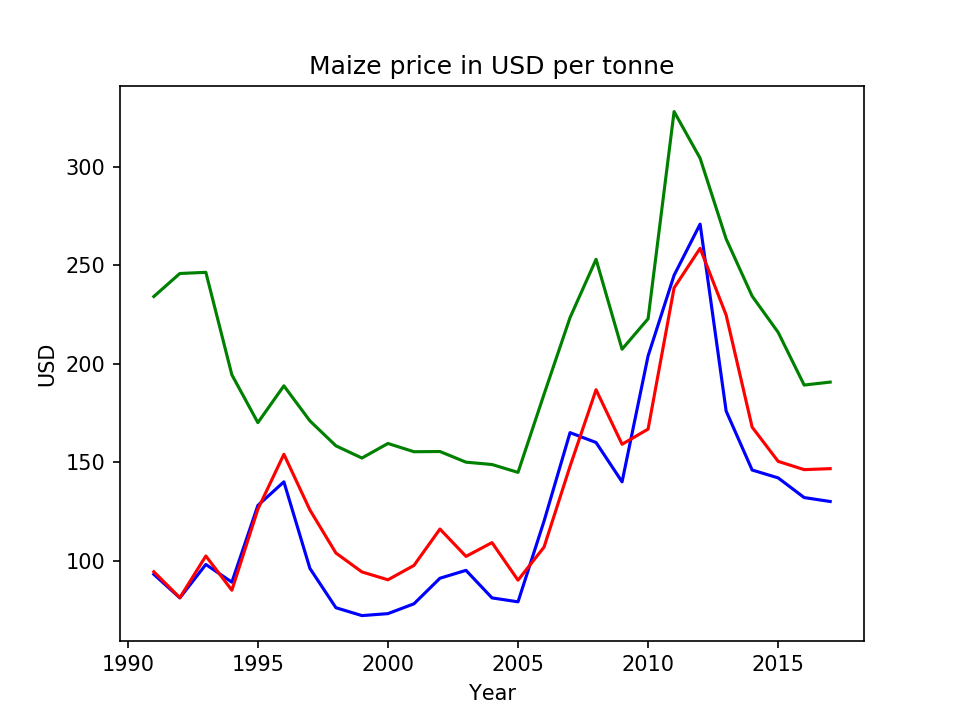

Text(0, 0.5, 'USD')

In [128]:
Mexico = plt.plot(time, maizeM, color="green", label="Mexico")
US = plt.plot(time, maizeU, color="blue", label="United States")
Canada = plt.plot(time, maizeC, color="red", label="Canada")
plt.title("Maize price in USD per tonne")
plt.xlabel("Year")
plt.ylabel("USD")

We conclude from the plot above that the series for maize price by year are non-stationary. According to Box-Jenkins methodology, a minimum of 50 observations are required in order to conduct an Auto Regressive Time Series model.